In [60]:
 import pandas as pd

# prevent false warning
# https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas
pd.options.mode.chained_assignment = None  # default='warn'

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np


import rasterio
import rasterio.mask

from dbconf import get_engine

In [50]:
df = pd.read_csv(
    '../input/data/malariaatlas_incidence/Pf_Incidence/Summary Tables/00_Pf_incidence_rate_table_Global_admin1_2000-2020.csv')


df = df[df['ISO'] == 'TZA']

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 630 entries, 108 to 38512
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ISO                    630 non-null    object 
 1   Admn_Level             630 non-null    int64  
 2   Name_0                 630 non-null    object 
 3   ID_0                   630 non-null    int64  
 4   Code_0                 0 non-null      object 
 5   Type_0                 630 non-null    object 
 6   Name_1                 630 non-null    object 
 7   ID_1                   630 non-null    int64  
 8   Code_1                 630 non-null    object 
 9   Type_1                 630 non-null    object 
 10  Source                 630 non-null    object 
 11  Year                   630 non-null    int64  
 12  Age                    630 non-null    object 
 13  Pop                    630 non-null    float64
 14  PAR                    630 non-null    float64
 15  in

In [52]:

with pd.option_context('display.max_rows', 5, 'display.max_columns', None): 
    display(df)

,ISO,Admn_Level,Name_0,ID_0,Code_0,Type_0,Name_1,ID_1,Code_1,Type_1,Source,Year,Age,Pop,PAR,incidence_rate_rmean,incidence_rate_LCI,incidence_rate_median,incidence_rate_UCI
108,TZA,1,Tanzania,10001003,NaN,Country,Kaskazini Unguja,10312965,51,Region,Tanzania NBS 2012,2000,0-99_years,1.362326e+05,1.362326e+05,0.510783,0.370387,0.508738,0.660224
133,TZA,1,Tanzania,10001003,NaN,Country,Morogoro,10313017,5,Region,Tanzania NBS 2012,2000,0-99_years,1.751004e+06,1.750878e+06,0.459662,0.333338,0.463545,0.564919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38458,TZA,1,Tanzania,10001003,NaN,Country,Arusha,10316307,2,Region,Tanzania NBS 2012,2020,0-99_years,2.173327e+06,2.066088e+06,0.111830,0.036468,0.109668,0.209389
38512,TZA,1,Tanzania,10001003,NaN,Country,Mtwara,10316433,9,Region,Tanzania NBS 2012,2020,0-99_years,1.429609e+06,1.429441e+06,0.151786,0.066275,0.136060,0.317949


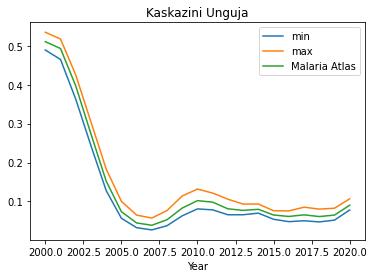

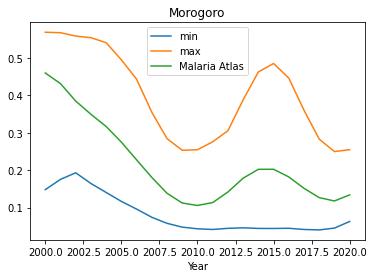

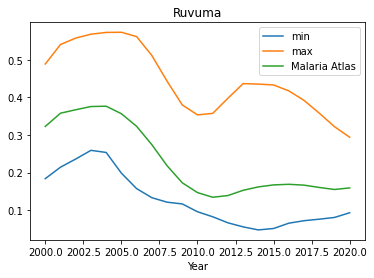

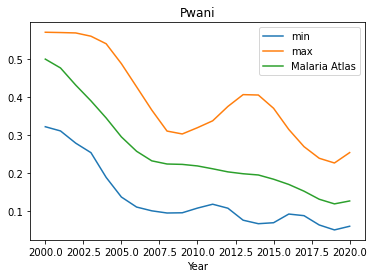

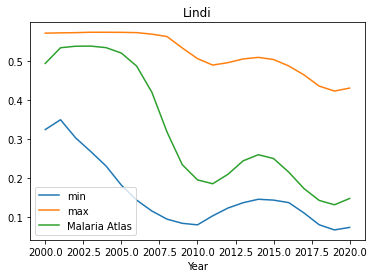

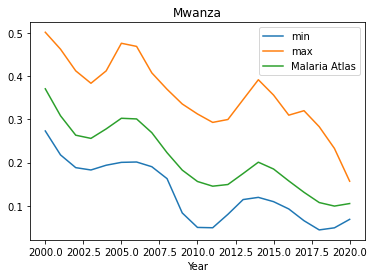

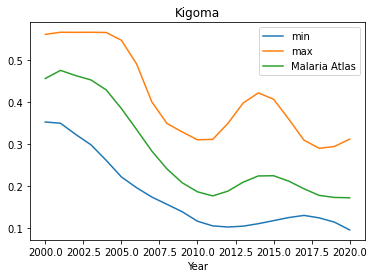

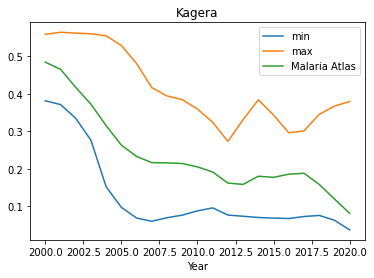

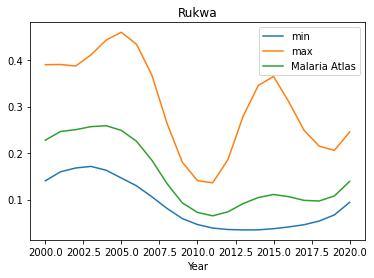

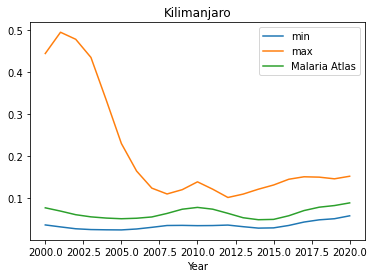

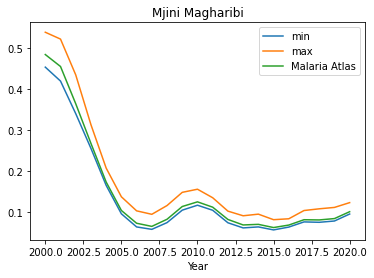

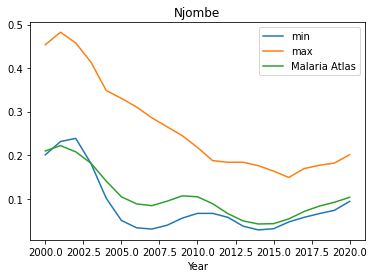

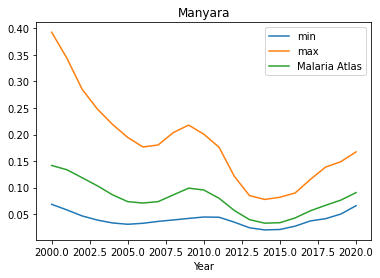

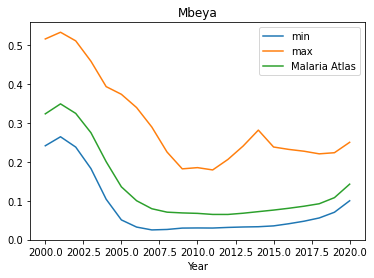

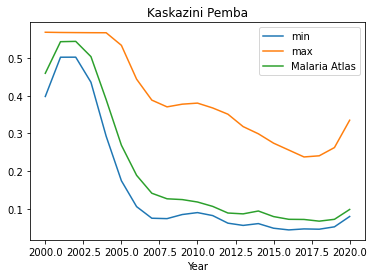

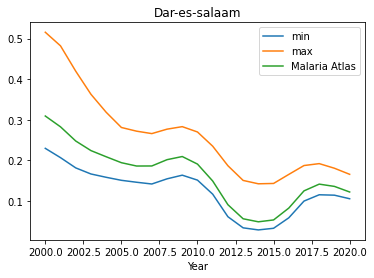

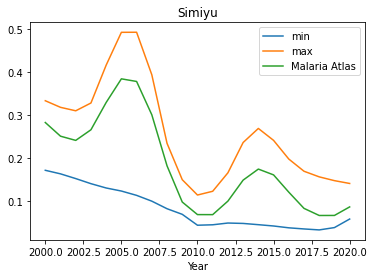

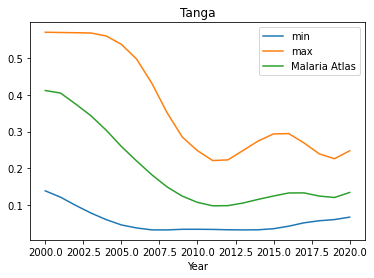

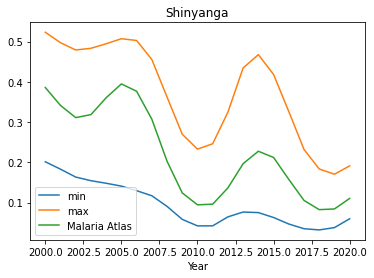

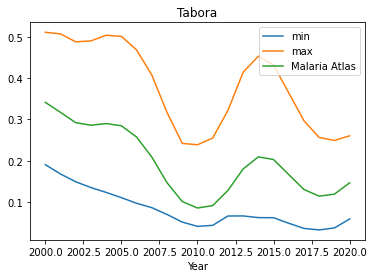

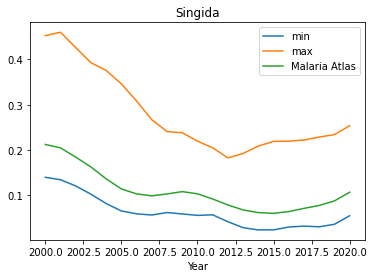

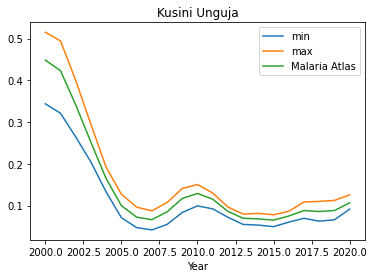

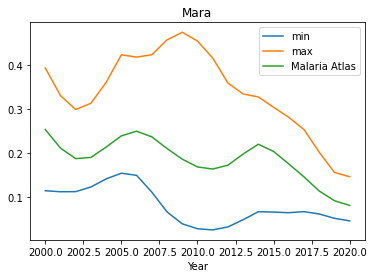

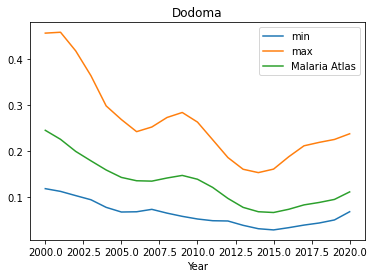

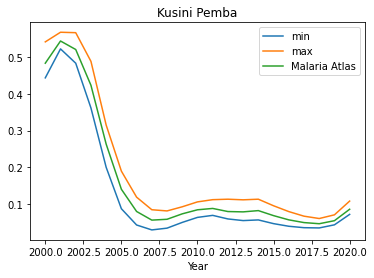

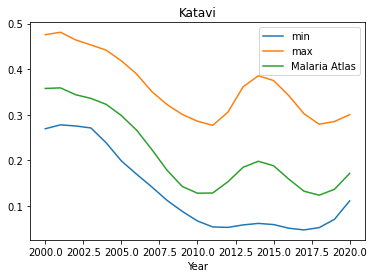

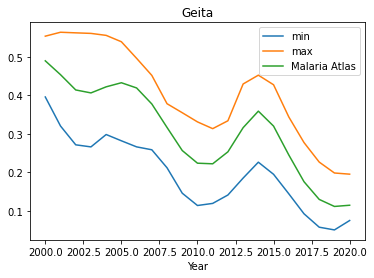

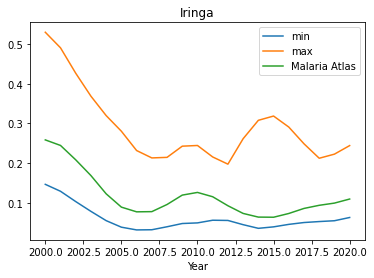

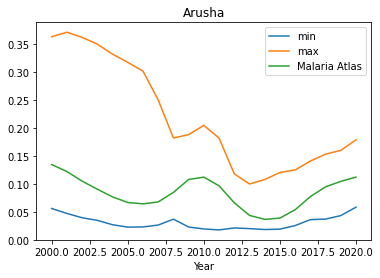

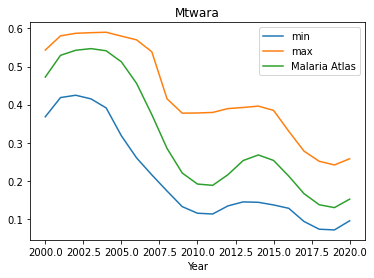

In [79]:
for region in list(df['Name_1'].unique()):
    atlas_df = df[df['Name_1'] == region]
    
    
    sql = f"SELECT * FROM malariaatlas_incidence WHERE shape_id = \
(SELECT id FROM shape WHERE name = '{region}' LIMIT 1)"
    db_df = pd.read_sql(sql, con=get_engine())
    
    
    ax = db_df.plot(x='year', y=[
                                 'malariaatlas_incidence_min', 
                                 'malariaatlas_incidence_max'], label=[ "min", "max"])
    atlas_df.plot(x='Year', y=['incidence_rate_rmean'], label=["Malaria Atlas"], ax=ax)
    plt.title(region)
    plt.show()


<AxesSubplot:xlabel='Year'>

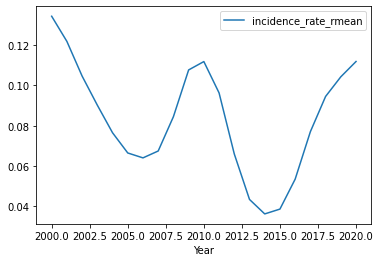

In [57]:
arusha_df.plot(x='Year', y=['incidence_rate_rmean'])

In [72]:
tiff = '/Users/jona/Downloads/2020_Global_PfPR_TZA_Arusha.tiff'
with rasterio.open(tiff) as src:
    nodata = src.nodata
    
    band1 = src.read(1)
    
    band1[band1==nodata] = np.nan
    band1[band1==0] = np.nan

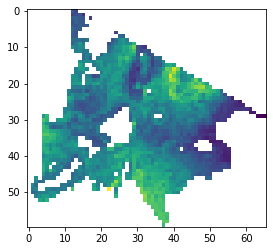

In [73]:
plt.imshow(band1)

In [74]:
np.nanmean(band1)


0.12017067

In [71]:
arusha_db_df

,index,malariaatlas_incidence,year,shape_id
0,1,0.197992,2000,2
1,227,0.193547,2001,2
2,453,0.178352,2002,2
3,679,0.165463,2003,2
4,905,0.151057,2004,2
5,1131,0.135241,2005,2
6,1357,0.121259,2006,2
7,1583,0.105699,2007,2
8,1809,0.095023,2008,2
9,2035,0.090025,2009,2
